# ¡Hola Adrian! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


------

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Adrian has demostrado buenas habilidades en la etapa de preparación de datos para tu proyecto, lo cual establece una base firme para tu análisis. En el apartado de visualización, utilizaste herramientas efectivas para comprender el comportamiento de consumo de los usuarios en diferentes planes, mostrando habilidad para representar datos complejos. Además, tu enfoque en las pruebas de hipótesis refleja un buen dominio de la metodología para realizar comparaciones estadísticas en diferentes conjuntos de datos. 

Sin embargo, es necesario ajustar el cálculo del consumo de minutos e internet para determinar con mayor precisión el cobro mensual por usuario, un aspecto clave para la validez de tus conclusiones. 

¡No te preocupes! Cada ajuste que haces es una oportunidad para aprender y mejorar. Vas por buen camino, y estoy seguro de que en la siguiente versión harás un gran trabajo y lograrás completar el proyecto con éxito. ¡Sigue adelante! 

Estaré atento a tu próxima iteración 👀


</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Adrian excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# objetivo del proyecto
**El propósito de este proyecto es analizar el comportamiento de los clientes de Megaline con respecto a las dos tarifas de prepago disponibles: Surf y Ultimate, con el objetivo de determinar cuál de ellas genera mayores ingresos para la empresa.**

**El análisis incluirá la limpieza y preparación de los datos, el cálculo de los ingresos generados por cada cliente y la comparación estadística de los ingresos medios entre las dos tarifas. Finalmente, se presentarán conclusiones basadas en evidencia que ayuden a orientar futuras decisiones comerciales y de marketing de la empresa.**

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from math import factorial
import math
from scipy import stats as st
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

In [3]:
# Revisar unas cuantas lineas de los datos para corroborar que se hayan cargado correctamente al leer los datos
print(
f"""
{calls.head(3)}
----------------
{internet.head(3)}
----------------
{messages.head(3)}
----------------
{plans.head(3)}
----------------
{users.head(3)}
"""
)


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
----------------
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
----------------
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
----------------
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
----------------
   user_id first_name  last

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


- **Tipos de datos correctos**  
- **No hay datos ausentes que rellenar**
- **Oportunidad de enriquecer los datos agregando columna que especifique la cantidad incluida en MB**

## Corregir datos

NO HAY TIPO DE DATOS QUE CORREGIR

## Enriquecer los datos

In [6]:
plans["gbs_included"] = plans["mb_per_month_included"] / 1024
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gbs_included  
0          15.0  
1          30.0  


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


- **reg_date y churn_date deberian estar en formato de fecha**  
- **Cambiar el tipo de datos de user id para evitar que se modifique, pues estos datos no deberian ser suceptibles a cambios matematicos**  
- **Se puede agregar el estado del plan es decir si sigue activo en lugar NaN**

### Corregir los datos

In [9]:
users["reg_date"] = pd.to_datetime(users["reg_date"])
users["churn_date"] = pd.to_datetime(users["churn_date"])
users["user_id"] = users["user_id"].astype("object")
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

In [10]:
users["churn_date"] = users["churn_date"].fillna("activo")

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


- **call_date deberia ser fecha**  
- **Cambiar el tipo de datos de user id para evitar que se modifique, pues estos datos no deberian ser suceptibles a cambios matematicos**  
- **Se podria agregar una columna donde se extraiga el mes para contabilizar la llamadas agrupadas por mes en futuros analisis**

### Corregir los datos

In [13]:
calls["call_date"] = pd.to_datetime(calls["call_date"])
calls["user_id"] = calls["user_id"].astype("object")
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enriquecer los datos

In [14]:
calls["call_month"] = calls["call_date"].dt.month
print(calls.sample(10))

              id user_id  call_date  duration  call_month
5096    1022_362    1022 2018-10-30      0.00          10
62483   1224_131    1224 2018-07-14     15.75           7
42294   1155_261    1155 2018-11-18     12.42          11
47512   1172_103    1172 2018-09-14      0.00           9
75494   1267_216    1267 2018-12-29      0.00          12
77513   1277_589    1277 2018-05-20      0.00           5
90457    1328_87    1328 2018-07-03      6.34           7
130706  1470_155    1470 2018-11-30      0.00          11
30633   1114_565    1114 2018-11-28      4.73          11
137052  1497_351    1497 2018-12-15      0.00          12


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


**Cambiar el tipo de datos de message_date**  
**Cambiar el tipo de datos de user id para evitar que se modifique, pues estos datos no deberian ser suceptibles a cambios matematicos**  
**Se podria agregar una columna donde se extraiga el mes para contabilizar los mensajes agrupados por mes en futuros analisis**

### Corregir los datos

In [17]:
messages["message_date"] = pd.to_datetime(messages["message_date"])
messages["user_id"] = messages["user_id"].astype("object")
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

In [18]:
messages["message_month"] = messages["message_date"].dt.month

print(messages.sample(5))

             id user_id message_date  message_month
11551   1078_18    1078   2018-12-09             12
62546    1393_3    1393   2018-11-29             11
12204  1080_207    1080   2018-12-04             12
17691  1114_799    1114   2018-07-29              7
63074  1399_139    1399   2018-11-01             11


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


- **Session_date deberia ser fecha**  
- **Cambiar el tipo de datos de user id para evitar que se modifique, pues estos datos no deberian ser suceptibles a cambios matematicos**  
- **Se podria agregar una columna donde se extraiga el mes para contabilizar los mb agrupados por mes en futuros analisis**

### Corregir los datos

In [21]:
internet["session_date"] = pd.to_datetime(internet["session_date"])
internet["user_id"] = internet["user_id"].astype("object")
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enriquecer los datos

In [22]:
internet["session_month"] = internet["session_date"].dt.month

print(internet.sample(5))

              id user_id session_date  mb_used  session_month
76900   1359_593    1359   2018-10-21   865.76             10
86073   1400_206    1400   2018-05-29     0.00              5
101338  1483_136    1483   2018-08-30   554.47              8
65341    1301_31    1301   2018-12-21     0.00             12
4994    1028_569    1028   2018-10-31   157.95             10


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `sample` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Estudiar las condiciones de las tarifas

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gbs_included  
0          15.0  
1          30.0  


## Agregar datos por usuario

In [24]:
# Aplicar Redondeo de minutos antes de agrupar
calls["calls_redondeado"] = calls["duration"].apply(math.ceil)

In [25]:
print(calls.head(10))

         id user_id  call_date  duration  call_month  calls_redondeado
0   1000_93    1000 2018-12-27      8.52          12                 9
1  1000_145    1000 2018-12-27     13.66          12                14
2  1000_247    1000 2018-12-27     14.48          12                15
3  1000_309    1000 2018-12-28      5.76          12                 6
4  1000_380    1000 2018-12-30      4.22          12                 5
5  1000_388    1000 2018-12-31      2.20          12                 3
6  1000_510    1000 2018-12-27      5.75          12                 6
7  1000_521    1000 2018-12-28     14.18          12                15
8  1000_530    1000 2018-12-28      5.77          12                 6
9  1000_544    1000 2018-12-26      4.40          12                 5


In [26]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Agregue el reset_index() despues del size para poder transformar el series en dataFrame y en pasos posteriores poder hacer un merge 
calls_by_user = calls.groupby(["user_id", "call_month"]).size().reset_index()

# Ajustar nombre de columnas para facilitar el merge how = outer
calls_by_user.columns = ["user_id", "month", "calls_month"]
print(calls_by_user)


      user_id  month  calls_month
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2253     1498     12           39
2254     1499      9           41
2255     1499     10           53
2256     1499     11           45
2257     1499     12           65

[2258 rows x 3 columns]


In [27]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Agregue el reset_index() despues del sum para poder transformar el series en dataFrame y en pasos posteriores poder hacer un merge 
minutes_by_user = calls.groupby(["user_id", "call_month"])["calls_redondeado"].sum().reset_index()

# Ajustar nombre de columnas para facilitar el merge how = outer
minutes_by_user.columns = ["user_id", "month", "minutes_month"]
print(minutes_by_user)

      user_id  month  minutes_month
0        1000     12            124
1        1001      8            182
2        1001      9            315
3        1001     10            393
4        1001     11            426
...       ...    ...            ...
2253     1498     12            339
2254     1499      9            346
2255     1499     10            385
2256     1499     11            308
2257     1499     12            496

[2258 rows x 3 columns]


In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Agregue el reset_index() despues del size para poder transformar el series en dataFrame y en pasos posteriores poder hacer un merge 
messages_by_user = messages.groupby(["user_id", "message_month"]).size().reset_index()

# Ajustar nombre de columnas para facilitar el merge how = outer
messages_by_user.columns = ["user_id", "month", "messages_month"]
print(messages_by_user)

      user_id  month  messages_month
0        1000     12              11
1        1001      8              30
2        1001      9              44
3        1001     10              53
4        1001     11              36
...       ...    ...             ...
1801     1496      9              21
1802     1496     10              18
1803     1496     11              13
1804     1496     12              11
1805     1497     12              50

[1806 rows x 3 columns]


In [29]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# Agregue el reset_index() despues del sum para poder transformar el series en dataFrame y en pasos posteriores poder hacer un merge 
mb_by_user = internet.groupby(["user_id", "session_month"])["mb_used"].sum().reset_index()

print(mb_by_user)

      user_id  session_month   mb_used
0        1000             12   1901.47
1        1001              8   6919.15
2        1001              9  13314.82
3        1001             10  22330.49
4        1001             11  18504.30
...       ...            ...       ...
2272     1498             12  23137.69
2273     1499              9  12984.76
2274     1499             10  19492.43
2275     1499             11  16813.83
2276     1499             12  22059.21

[2277 rows x 3 columns]


In [30]:
# Convertir MB a GB y redondear hacia arriba
mb_by_user["mb_used"] = (mb_by_user["mb_used"] / 1024).apply(math.ceil)

# Ajustar nombre de columnas para facilitar el merge how = outer
mb_by_user.columns = ["user_id", "month", "gbs_month"]
print(mb_by_user)

      user_id  month  gbs_month
0        1000     12          2
1        1001      8          7
2        1001      9         14
3        1001     10         22
4        1001     11         19
...       ...    ...        ...
2272     1498     12         23
2273     1499      9         13
2274     1499     10         20
2275     1499     11         17
2276     1499     12         22

[2277 rows x 3 columns]


In [31]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# merge de calls_by_user & minutes_by_user
consumo_mensual = calls_by_user.merge(minutes_by_user, on = ["user_id", "month"], how= "outer")


# merge agregando messages_by_user
consumo_mensual = consumo_mensual.merge(messages_by_user, on= ["user_id", "month"], how= "outer")


# merge agregando  mb_by_user
consumo_mensual = consumo_mensual.merge(mb_by_user, on=["user_id", "month"], how= "outer")
print(consumo_mensual)


      user_id  month  calls_month  minutes_month  messages_month  gbs_month
0        1000     12         16.0          124.0            11.0        2.0
1        1001      8         27.0          182.0            30.0        7.0
2        1001      9         49.0          315.0            44.0       14.0
3        1001     10         65.0          393.0            53.0       22.0
4        1001     11         64.0          426.0            36.0       19.0
...       ...    ...          ...            ...             ...        ...
2288     1349     12          NaN            NaN            61.0       13.0
2289     1361      5          NaN            NaN             2.0        2.0
2290     1482     10          NaN            NaN             2.0        NaN
2291     1108     12          NaN            NaN             NaN        1.0
2292     1311      6          NaN            NaN             NaN        2.0

[2293 rows x 6 columns]


In [32]:
# correcion de datos del dataframe recien creado consumo_mensual
# rellenar los NaN con 0
consumo_mensual = consumo_mensual.fillna(0)

# convertir user_id a objeto
consumo_mensual["user_id"] = consumo_mensual["user_id"].astype("object")

# convertir los tipos de datos a enteros en calls_month, messages_month
consumo_mensual["calls_month"] = consumo_mensual["calls_month"].astype(int)
consumo_mensual["messages_month"] = consumo_mensual["messages_month"].astype(int)

print(consumo_mensual)
consumo_mensual.info()

     user_id  month  calls_month  minutes_month  messages_month  gbs_month
0       1000     12           16          124.0              11        2.0
1       1001      8           27          182.0              30        7.0
2       1001      9           49          315.0              44       14.0
3       1001     10           65          393.0              53       22.0
4       1001     11           64          426.0              36       19.0
...      ...    ...          ...            ...             ...        ...
2288    1349     12            0            0.0              61       13.0
2289    1361      5            0            0.0               2        2.0
2290    1482     10            0            0.0               2        0.0
2291    1108     12            0            0.0               0        1.0
2292    1311      6            0            0.0               0        2.0

[2293 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
D

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste una correcta agrupación de los datos combinando `groupby`  y `merge`, pero recuerda que, según el enunciado del proyecto, los valores de duración de llamadas y consumo de internet deben redondearse hacia arriba, ya que el cobro se hace por minuto y GB completo. Para esto debes tener en cuenta lo siguiente:

* **Llamadas:** Primero realiza el redondeo hacia arriba de los minutos para cada llamada y luego sumas los minutos totales por usuario para cada mes.

* **Internet:** Primero sumas el consumo total en MB para cada usuario por mes, luego conviertes ese valor a GB y finalmente realizas el redondeo hacia arriba.

Los valores finales que obtienes para cada usuario, los comparas con los minutos y GB incluidos en cada plan, con el fin de establecer si hubo un exceso en el consumo y hacer el cobro respectivo.

</div>

In [33]:
# Añade la información de la tarifa

# agregar la información del plan de cada usuario
consumo_mensual = consumo_mensual.merge(users[["user_id", "plan"]], on="user_id", how="left")

# agregar los detalles de cada plan
consumo_mensual = consumo_mensual.merge(plans, left_on="plan", right_on="plan_name", how="left")
print(consumo_mensual.head())


  user_id  month  calls_month  minutes_month  messages_month  gbs_month  \
0    1000     12           16          124.0              11        2.0   
1    1001      8           27          182.0              30        7.0   
2    1001      9           49          315.0              44       14.0   
3    1001     10           65          393.0              53       22.0   
4    1001     11           64          426.0              36       19.0   

       plan  messages_included  mb_per_month_included  minutes_included  \
0  ultimate               1000                  30720              3000   
1      surf                 50                  15360               500   
2      surf                 50                  15360               500   
3      surf                 50                  15360               500   
4      surf                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               70   

In [34]:
del consumo_mensual["plan_name"]

print(consumo_mensual.head())

  user_id  month  calls_month  minutes_month  messages_month  gbs_month  \
0    1000     12           16          124.0              11        2.0   
1    1001      8           27          182.0              30        7.0   
2    1001      9           49          315.0              44       14.0   
3    1001     10           65          393.0              53       22.0   
4    1001     11           64          426.0              36       19.0   

       plan  messages_included  mb_per_month_included  minutes_included  \
0  ultimate               1000                  30720              3000   
1      surf                 50                  15360               500   
2      surf                 50                  15360               500   
3      surf                 50                  15360               500   
4      surf                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  gbs_included  
0               70

In [35]:
# Calcular los excedentes de minutos, messages, gbs, si el resultado es negativo se convierte a 0  con .clip(lower=0)
# Crear una nueva columna para cada resultado
consumo_mensual["minutes_exceeded"] = (consumo_mensual["minutes_month"] - consumo_mensual["minutes_included"]).clip(lower=0)
consumo_mensual["messages_exceeded"] = (consumo_mensual["messages_month"] - consumo_mensual["messages_included"]).clip(lower=0)
consumo_mensual["gbs_exceeded"] = (consumo_mensual["gbs_month"] - consumo_mensual["gbs_included"]).clip(lower=0)

# Calcular el cargo por cada tipo de exceso 
# Crear una nueva columna para cada resultado
consumo_mensual["minutes_exceeded_charge"] = consumo_mensual["minutes_exceeded"] * consumo_mensual["usd_per_minute"]
consumo_mensual["messages_exceeded_charge"] = consumo_mensual["messages_exceeded"] * consumo_mensual["usd_per_message"]
consumo_mensual["gbs_exceeded_charge"] = consumo_mensual["gbs_exceeded"] * consumo_mensual["usd_per_gb"]

# Sumar tarifa mensual + cargos por exceso para obtener el ingreso total del mes por usuario
consumo_mensual["total_charge"] = consumo_mensual["usd_monthly_pay"] + consumo_mensual["minutes_exceeded_charge"] + consumo_mensual["messages_exceeded_charge"] + consumo_mensual["gbs_exceeded_charge"]

# Redondear  la suma total a 2 decimales
consumo_mensual["total_charge"] = consumo_mensual["total_charge"].round(2)

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(consumo_mensual.head())

  user_id  month  calls_month  minutes_month  messages_month  gbs_month  \
0    1000     12           16          124.0              11        2.0   
1    1001      8           27          182.0              30        7.0   
2    1001      9           49          315.0              44       14.0   
3    1001     10           65          393.0              53       22.0   
4    1001     11           64          426.0              36       19.0   

       plan  messages_included  mb_per_month_included  minutes_included  \
0  ultimate               1000                  30720              3000   
1      surf                 50                  15360               500   
2      surf                 50                  15360               500   
3      surf                 50                  15360               500   
4      surf                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  gbs_included  \
0               7

### Ingresos totales por plan

In [37]:
# calcular ingresos por plan
consumo_mensual_grouped = consumo_mensual.groupby("plan")["total_charge"].sum()

print(consumo_mensual_grouped)

plan
surf        95491.18
ultimate    52066.00
Name: total_charge, dtype: float64


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La lógica de cálculo del cobro mensual es correcta en general, solo necesitas ajustar el redondeo como te mencioné antes. Asegúrate de hacer la estimación del cobro por el consumo de internet comparando los datos en GB, además es importante considerar el plan de cada usuario, el costo del plan base y los cargos por consumos adicionales para calcular correctamente el monto final.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Perfecto Adrian, has calculado correctamente el cobro mensual para cada usuario

</div>

## Estudia el comportamiento de usuario

In [38]:
# Definir Datos del Diseño de los Graficos
colores = {"surf": '#1f77b4', "ultimate": '#ff7f0e'}
orden_planes= ['surf', 'ultimate']

### Llamadas

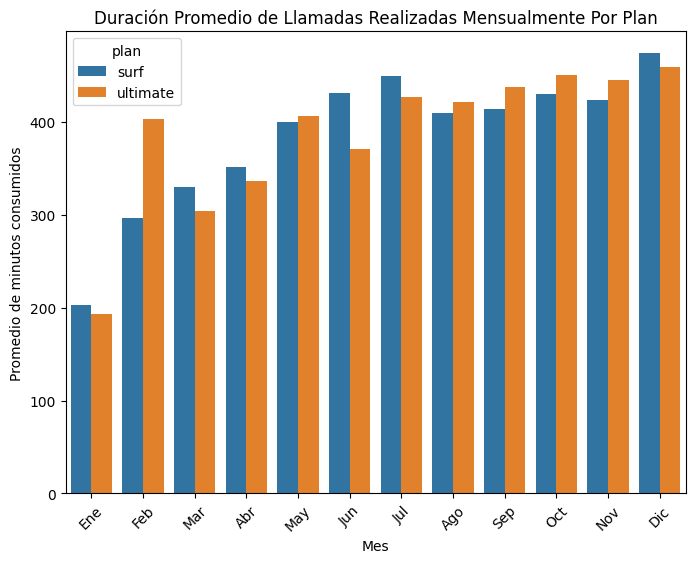

In [39]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Crear dataframe con la info necesaria para graficar
datos_llamadas = consumo_mensual[['month', 'minutes_month','plan']]

# Agrupar los datos por plan y mes arrojando el promedio mensual
promedio_llamadas_grouped = datos_llamadas.groupby(["plan", "month"])["minutes_month"].mean().reset_index()

#crear grafico
plt.figure(figsize=(8, 6))  # Aumentar el ancho
sns.barplot(data= promedio_llamadas_grouped, x= "month", y= "minutes_month", hue= "plan", palette= colores, hue_order=orden_planes)
plt.title("Duración Promedio de Llamadas Realizadas Mensualmente Por Plan")
plt.xlabel("Mes")
plt.ylabel("Promedio de minutos consumidos")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation= 45)
plt.show()

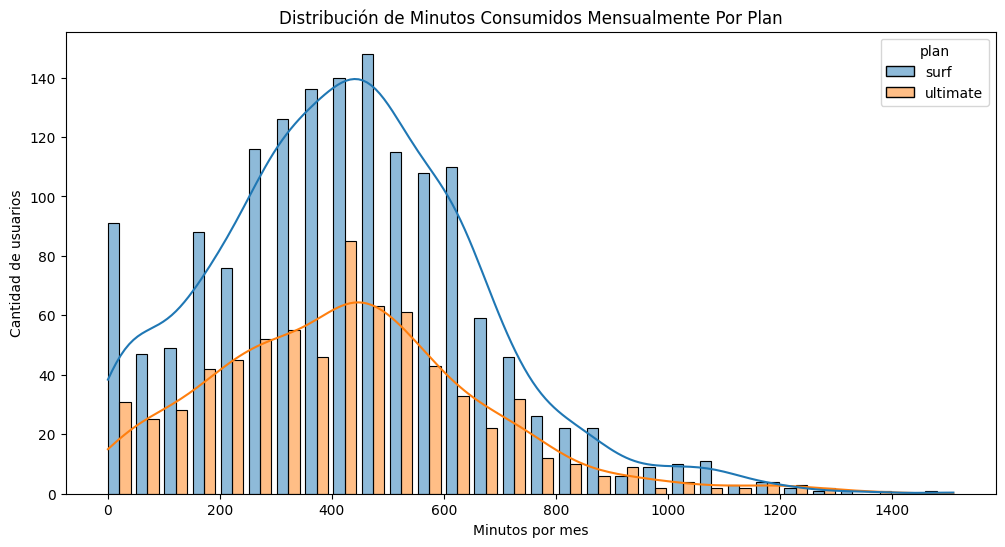

In [40]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(12, 6))
sns.histplot(data=datos_llamadas, x='minutes_month', hue='plan', bins=30, multiple= "dodge", shrink= .8, kde= True, palette= colores, hue_order=orden_planes)
plt.title('Distribución de Minutos Consumidos Mensualmente Por Plan')
plt.xlabel('Minutos por mes')
plt.ylabel('Cantidad de usuarios')
plt.show()

In [41]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Media y Varianza ane general
llamadas_mean = datos_llamadas["minutes_month"].mean()
print("Promedio Minutos Mensuales en General:", llamadas_mean)

llamadas_var = datos_llamadas ["minutes_month"].var()
print("Varianza de LLamadas Mensuales en General:", llamadas_var)

#Media y Varianza por plan
llamadas_grouped_mean_var = datos_llamadas.groupby(["plan"])["minutes_month"].agg(["mean", "var"])

print(""" 

Media y Varianza por Plan""")
print(llamadas_grouped_mean_var)

Promedio Minutos Mensuales en General: 429.2834714348016
Varianza de LLamadas Mensuales en General: 55847.17877118995
 

Media y Varianza por Plan
                mean           var
plan                              
surf      428.749523  54968.279461
ultimate  430.450000  57844.464812


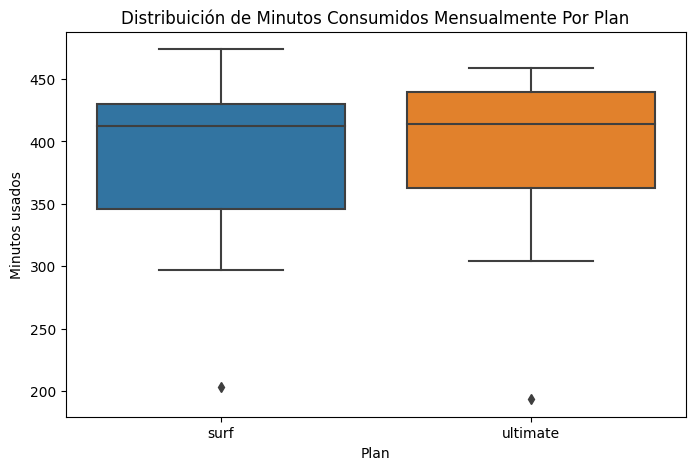

In [42]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(8, 5))
sns.boxplot(data=promedio_llamadas_grouped, x='plan', y='minutes_month', palette= colores, hue_order=orden_planes)

plt.title("Distribuición de Minutos Consumidos Mensualmente Por Plan")
plt.xlabel('Plan')
plt.ylabel('Minutos usados')
plt.show()


## **Conclusiones del analisis de llamadas**
**Los usuarios no cambian drásticamente su comportamiento de llamadas según el plan que tengan, de hecho el promedio entre cada plan no varia mucho entre ellos.**  
**El plan Ultimate no genera significativamente más uso de minutos**  
**La distritribucion de la duracion de las llamadas se encuentra sesgada a la derecha**


### Mensajes

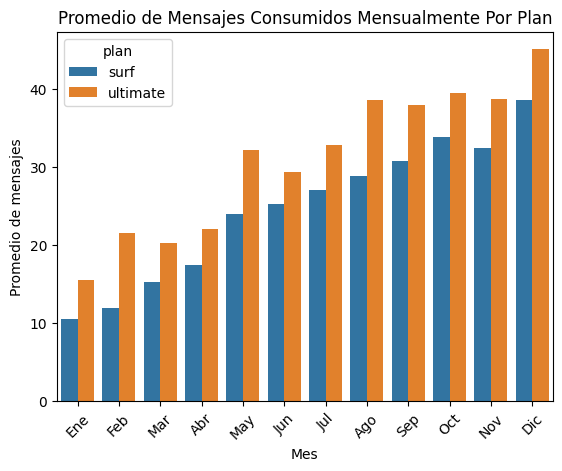

In [43]:
# Comprara el número de mensajes promedio que tienden a enviar cada mes los usuarios de cada plan. Traza un gráfico de barras para visualizarla.

# DataFrame con los datos necesarios para el analisis de mensajes
datos_mensajes = consumo_mensual[["month", "messages_month", "plan"]]

# Agrupar los datos por mes y por plan 
promedio_datos_mensajes = datos_mensajes.groupby(["plan", "month"])["messages_month"].mean().reset_index()

# Generar grafico de barras para la comparacion entre planes
sns.barplot(data=promedio_datos_mensajes, x="month", y="messages_month", hue="plan", palette= colores, hue_order=orden_planes)
plt.title("Promedio de Mensajes Consumidos Mensualmente Por Plan")
plt.ylabel("Promedio de mensajes")
plt.xlabel("Mes")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation= 45)
plt.show()

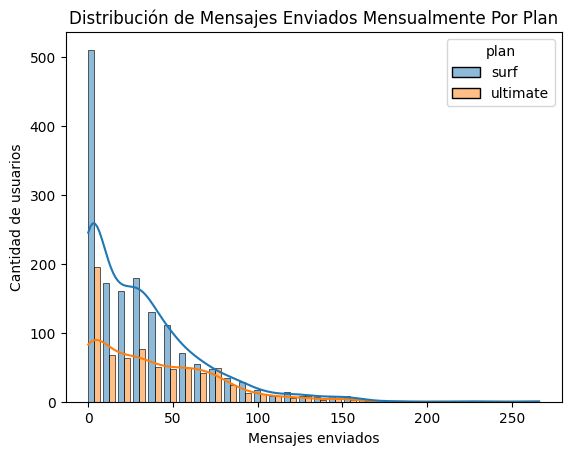

In [44]:

# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
sns.histplot(data=datos_mensajes, x= "messages_month", hue="plan", multiple="dodge", bins=30,kde= True, shrink=.8, palette= colores, hue_order=orden_planes)
plt.title('Distribución de Mensajes Enviados Mensualmente Por Plan')
plt.xlabel('Mensajes enviados')
plt.ylabel('Cantidad de usuarios')
plt.show()

In [45]:
# Calcula la media y la varianza de la cantidad mensajes enviados mensualmente.
mensajes_mean = datos_mensajes["messages_month"].mean()
mensajes_var = datos_mensajes["messages_month"].var()

mensajes_grouped_mean_var = datos_mensajes.groupby("plan")["messages_month"].agg(["mean", "var"])
print(f"""
Promedio de mensajes en genral: {mensajes_mean}
Varianza mensjaes en general: {mensajes_var}

Media y Varianza por Plan
{mensajes_grouped_mean_var}
""")


Promedio de mensajes en genral: 33.166593981683384
Varianza mensjaes en general: 1160.770663655758

Media y Varianza por Plan
               mean          var
plan                            
surf      31.159568  1126.724522
ultimate  37.551389  1208.756744



Text(0, 0.5, 'Mensajes Enviados')

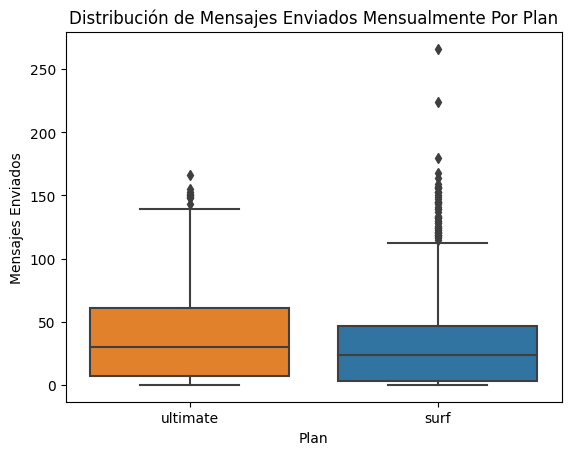

In [46]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente.
sns.boxplot(data=datos_mensajes, x="plan", y="messages_month", palette= colores, hue_order=orden_planes)

plt.title("Distribución de Mensajes Enviados Mensualmente Por Plan")
plt.xlabel("Plan")
plt.ylabel("Mensajes Enviados")

## **Conclusiones del analisis de mensajes**  
**El promedio de mensajes enviados por los usuarios del plan ultimate es mayor que el promedio de mensajes enviados por los usuarios del plan surf**  
**Ambos graficos de distribuicion se encuentran sesgados a la derecha**  
**Ambos planes envian pocos mensajes, encontrandose el 80% de los datos por debajo de 100 mensajes mensuales aproximadamente**  
**El plan Surf tiene más usuarios con bajo consumo de mensajes.**

### Internet

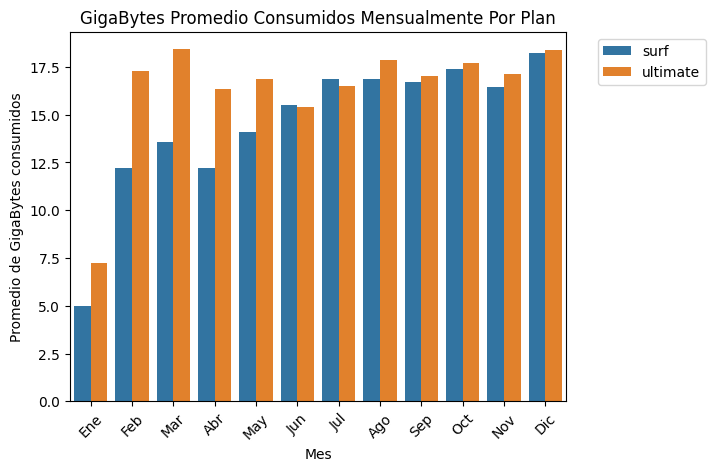

In [47]:
# Compara la cantidad de gbs promedio que tienden a usar por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar los datos por plan y por mes
promedio_datos_gbs = consumo_mensual.groupby(["plan", "month"])["gbs_month"].mean().reset_index()

# Cear grafico
sns.barplot(data=promedio_datos_gbs, x="month", y="gbs_month", hue="plan", palette= colores, hue_order=orden_planes)

plt.title("GigaBytes Promedio Consumidos Mensualmente Por Plan")
plt.xlabel("Mes")
plt.ylabel("Promedio de GigaBytes consumidos")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
           ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation= 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

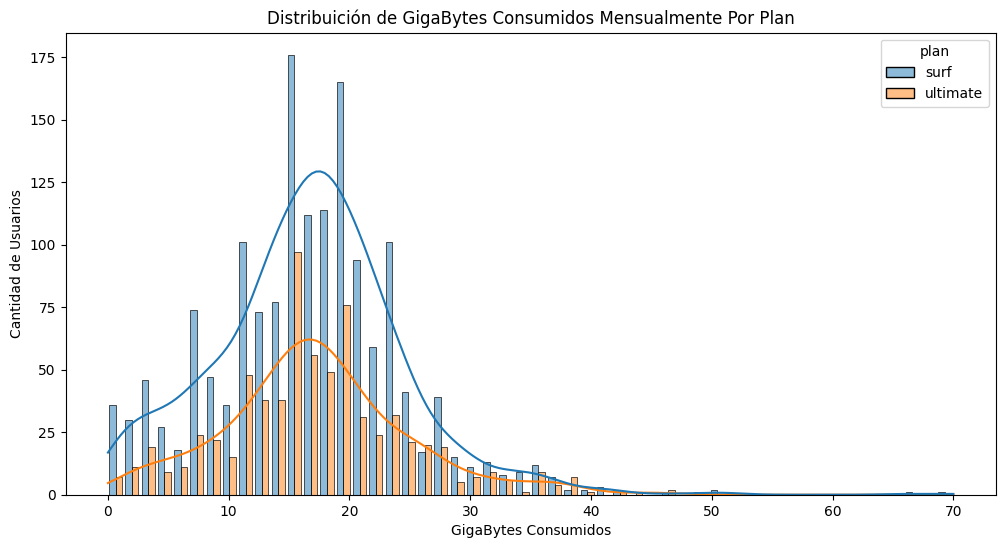

In [48]:
# Compara el número de gbs mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Crear dataFrame con datos necesarios
datos_gbs = consumo_mensual[["plan", "month", "gbs_month"]]

# Crear histograma
plt.figure(figsize=(12,6))
sns.histplot(data= datos_gbs, x="gbs_month", hue="plan", multiple="dodge", kde= True, shrink=.8, palette= colores, hue_order=orden_planes)

plt.title("Distribuición de GigaBytes Consumidos Mensualmente Por Plan")
plt.xlabel("GigaBytes Consumidos")
plt.ylabel("Cantidad de Usuarios")
plt.show()

In [49]:
# Calcula la media y la varianza de la cantidad gbs usados mensualmente.
datos_gbs_mean = datos_gbs["gbs_month"].mean()
datos_gbs_var = datos_gbs["gbs_month"].var()

datos_gbs_mean_var =  datos_gbs.groupby("plan")["gbs_month"].agg(["mean", "var"])


print(f"""
Promedio MegaBytes General: {datos_gbs_mean}
Varianza MegaBytes General: {datos_gbs_var}

Promedio y Varianza por Plan
{datos_gbs_mean_var}
""")



Promedio MegaBytes General: 16.870475359790667
Varianza MegaBytes General: 60.78033646677916

Promedio y Varianza por Plan
               mean       var
plan                         
surf      16.670693  61.58360
ultimate  17.306944  58.83055



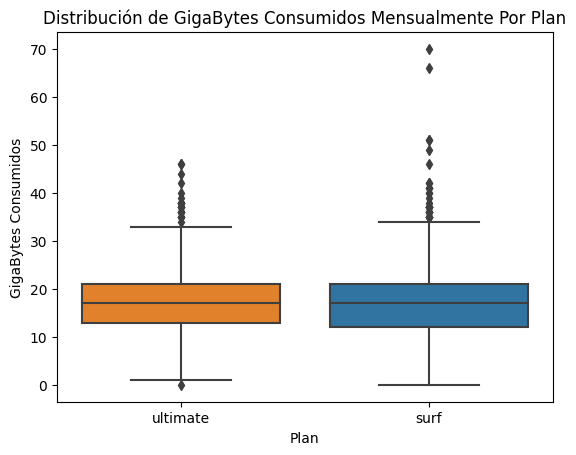

In [50]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente.

sns.boxplot(data=datos_gbs, x= "plan", y="gbs_month", palette= colores, hue_order=orden_planes)
plt.title("Distribución de GigaBytes Consumidos Mensualmente Por Plan")
plt.xlabel("Plan")
plt.ylabel("GigaBytes Consumidos")
plt.show()

## **Conclusiones del analisis del consumo de MegaBytes**  
**En prácticamente todos los meses, el plan Ultimate muestra un consumo superior al plan Surf, pero esta diferencia no es muy grande a excepcion de los meses de febrero, marzo, abril y mayo**  
**El promedio de consumo de GigaBytes del plan Surf es de 16.67 contra 17.30 GigaBytes, lo cual es una diferencia relativamente pequeña**  
**Plan Surf tiene un pico más alto y concentrado alrededor de 15-20 GigaBytes y el Plan Ultimate tiene Distribución más amplia y desplazada hacia consumos menores**

## Ingreso

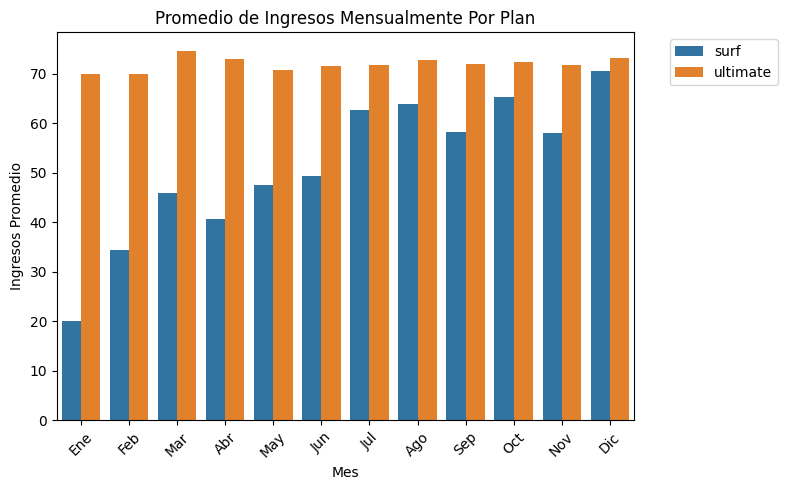

In [51]:
# Compara la cantidad de gbs promedio que tienden a usar por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
promedio_datos_ingresos = consumo_mensual.groupby(["plan", "month"])["total_charge"].mean().reset_index()

# Generar grafico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=promedio_datos_ingresos, x="month", y="total_charge", hue="plan", palette= colores, hue_order=orden_planes)
plt.title("Promedio de Ingresos Mensualmente Por Plan")
plt.xlabel("Mes")
plt.ylabel("Ingresos Promedio")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
           ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation= 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta automáticamente el espaciado
plt.show()

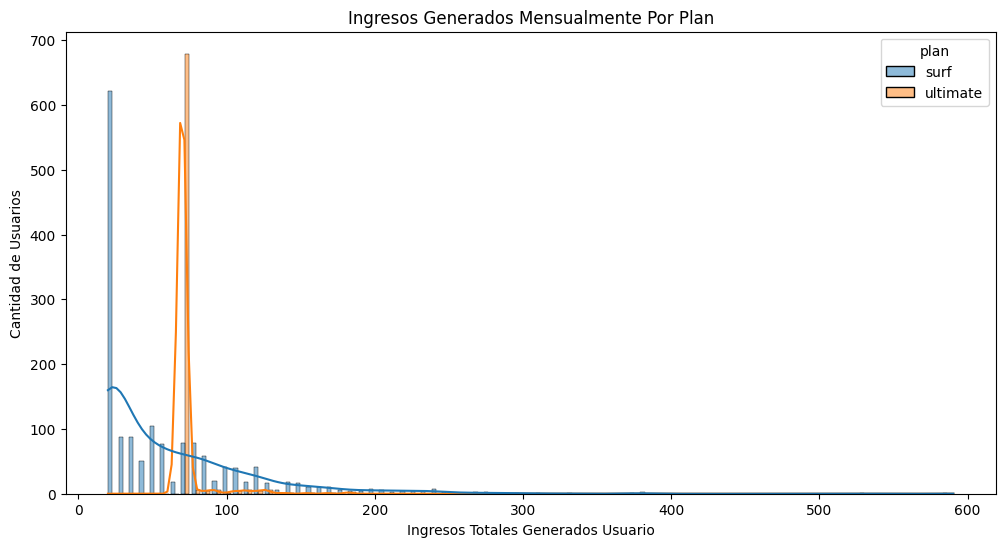

In [52]:
# Compara el número de gbs mensuales que necesitan los usuarios de cada plan. Traza un histograma.
datos_ingresos= consumo_mensual[["plan", "month", "total_charge"]]

plt.figure(figsize=(12,6))
sns.histplot(data=datos_ingresos, x="total_charge", hue="plan", multiple="dodge", shrink=.8, kde=True, palette= colores, hue_order=orden_planes)
plt.title("Ingresos Generados Mensualmente Por Plan")
plt.xlabel("Ingresos Totales Generados Usuario")
plt.ylabel("Cantidad de Usuarios")
plt.show()

In [65]:
# Calcula la media y la varianza de la cantidad gbs usados mensualmente.
datos_ingresos_mean = datos_ingresos["total_charge"].mean()
datos_ingresos_var = datos_ingresos["total_charge"].var()
datos_ingresos_mean_var = datos_ingresos.groupby("plan")["total_charge"].agg(["mean", "var"])

# Mediana
datos_plan_surf = datos_ingresos.query("plan == 'surf'")["total_charge"]
mediana = datos_plan_surf.median()

print(f"""
Promedio Ingresos General: {datos_ingresos_mean}
Varianza Ingresos General: {datos_ingresos_var}

Promedio y Varianza por Plan
{datos_ingresos_mean_var}

Mediana plan surf: {mediana}

Describe Plan Surf: 
{datos_plan_surf.describe()}
""")


Promedio Ingresos General: 64.3511469690362
Varianza Ingresos General: 2173.8855276978497

Promedio y Varianza por Plan
               mean          var
plan                            
surf      60.706408  3067.835152
ultimate  72.313889   129.848486

Mediana plan surf: 40.36

Describe Plan Surf: 
count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: total_charge, dtype: float64



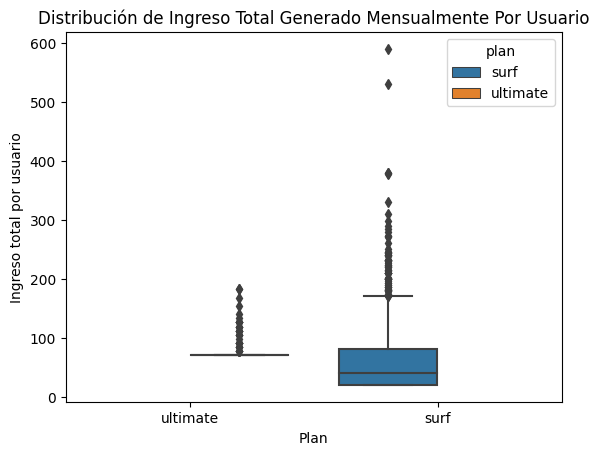

In [54]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente.
sns.boxplot(data=datos_ingresos, x="plan", y="total_charge", hue="plan", palette= colores, hue_order=orden_planes)

plt.title('Distribución de Ingreso Total Generado Mensualmente Por Usuario')
plt.ylabel('Ingreso total por usuario')
plt.xlabel('Plan')
plt.show()

## Conclusiones Sobre los Ingresos Generados por Cada Plan
-**EL promedio de ingresos del plan surf estan en todos los meses por debajo del plan ultimate**
- **Los ingresos promedio mensuales son muy constantes para el plan Ultimate, y muy variantes para el plan surf.**
- **El 75% de los usuarios no pasan de pagar 80.36 Dolares, y el 50% no pasan de pagar 40.36 Dolares lo que indica que aunque el Plan Surf genera más ingresos se debe a su alto volumen de demanda**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo con las visualizaciones de datos. Además, calculaste correctamente la información estadística de cada distribución de datos (minutos, mensajes e internet). Esto permite identificar patrones de comportamiento en los usuarios y extraer información valiosa para la compañía.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Respecto a la información sobre **Ingresos**, seguramente las gráficas y datos que obtuviste cambiarán cuando hagas el ajuste en el cálculo de los cobros mensuales por usuario en cada plan, entonces vale la pena revisar si tu análisis deba ser ajustado también.

</div>
</div>

## Prueba las hipótesis estadísticas


**Hipotesis Nula (H₀):**  
- Los ingresos promedio del plan surf son iguales a los ingresos promedio del plan ultimate.  

**Hipótesis Alternativa (H₁):**  
- Los ingresos promedio de los usuarios del plan Ultimate son diferentes a los ingresos promedio de los usuarios del plan Surf


In [55]:
# Prueba las hipótesis

# Filtrar los datos
ingresos_surf = datos_ingresos[datos_ingresos["plan"]== "surf"]["total_charge"]
ingresos_ultimate = datos_ingresos[datos_ingresos["plan"]== "ultimate"]["total_charge"]

In [56]:
# Prueba de levene
stat_levene, p_value_levene = st.levene(ingresos_surf, ingresos_ultimate)

print(f"Levene varianzas entre surf y ultimate")
print(f"Valor p: {p_value_levene:.4f}")

# Interpretar resultado
alpha = 0.05
if p_value_levene > alpha:
    print("Las varianzas son homogéneas (equal_var=True)")
    equal_var = True
else:
    print("Las varianzas NO son homogéneas (equal_var=False)")
    equal_var = False


Levene varianzas entre surf y ultimate
Valor p: 0.0000
Las varianzas NO son homogéneas (equal_var=False)


In [57]:
# Nivel de significancia (si el resultado de p es mayor al 05% significa que la diferencia podria ser por casualidad y si es menor no es casualidad)
alpha= .05

# Realizar la prueba t de las 2 muestras
results1 = st.ttest_ind(ingresos_ultimate, ingresos_surf, equal_var = False)

print('valor p:', results1.pvalue)

if results1.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 3.1703905481135734e-15
Rechazamos la hipótesis nula


**Hipotesis Nula (H₀):**  
- Los ingresos promedio generados por los usuarios del área de NY.NJ son iguales a los ingresos promedio generados por otras regiones.

**Hipótesis Alternativa (H₁):**  
- Los ingresos promedio generados por los usuarios del área de NY.NJ son diferentes a los ingresos promedio generados por otras regiones.

In [58]:
# Prueba las hipótesis

# Agregar información de ciudad al DataFrame consumo_mensual
consumo_mensual = consumo_mensual.merge(users[["user_id", "city"]], on="user_id", how="left")

In [59]:
# Filtrar datos para comparar
users_ny_nj = consumo_mensual[consumo_mensual["city"].str.contains('NY-NJ', case=False, na=False)]["total_charge"]
users_not_ny_nj = consumo_mensual[~consumo_mensual["city"].str.contains('NY-NJ',case=False, na=False)]["total_charge"]

In [60]:
# Prueba de levene
stat_levene, p_value_levene = st.levene(users_ny_nj, users_not_ny_nj)

print(f"Levene varianzas entre NY-NJ y Otras Regiones")
print(f"Valor p: {p_value_levene:.4f}")

# Interpretar resultado
alpha = 0.05
if p_value_levene > alpha:
    print("Las varianzas son homogéneas (equal_var=True)")
    equal_var = True
else:
    print("Las varianzas NO son homogéneas (equal_var=False)")
    equal_var = False


Levene varianzas entre NY-NJ y Otras Regiones
Valor p: 0.1258
Las varianzas son homogéneas (equal_var=True)


In [64]:
# Nivel de significancia (Nivel de error aceptado menor al 05%)
alpha = .05

#prueba de hipotesis
results2 = st.ttest_ind(users_ny_nj, users_not_ny_nj, equal_var=True)

print('Valor p:', results2.pvalue)

if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencia significativa entre regiones")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa")

Valor p: 0.043557431621342436
Rechazamos la hipótesis nula: Hay diferencia significativa entre regiones


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Adrian aplicaste correctamente las pruebas de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de  [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función ``ttest_ind``. Esto te brindará una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

También es necesario que revises si el resultado de las pruebas cambia luego de que hagas los ajustes en el cálculo del cobro mensual

</div>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Buen trbajo implementando la prueba de Levene, esto le da mayor robustez a tu análisis estadístico

</div>

## CONCLUSIONES GENERALES DEL PROYECTO

Principales Hallazgos  
**1. Comportamiento de Ingresos por Plan:**
Plan Ultimate: Genera ingresos más estables y predecibles aproximadamente 72 Dolares mensuales.  
Plan Surf: Presenta mayor variabilidad, con ingresos que oscilan entre \$ 20-600 con el 75% de los usuarios por debajo de \\$ 80.36 Dolares
Los usuarios de Surf tienden a exceder más frecuentemente los límites incluidos

**2. Patrones de Consumo:**
Usuarios Ultimate: Raramente superan los límites incluidos (3000 min, 1000 SMS, 30GB)
Usuarios Surf: Frecuentemente exceden los límites básicos (500 min, 50 SMS, 15GB), generando cargos adicionales

**3. Distribución de Ingresos:**
Ultimate: Distribución concentrada y uniforme alrededor del precio base
Surf: Distribución sesgada a la derecha con cola larga, indicando usuarios de alto consumo
<br>
<br>
### Resultados de las Pruebas de Hipótesis
- ### **Hipotesis 1**

**Hipotesis Nula (H₀):**  
Los ingresos promedio del plan surf son iguales a los ingresos promedio del plan ultimate.  
**Hipótesis Alternativa (H₁):**  
Los ingresos promedio de los usuarios del plan Ultimate son diferentes a los ingresos promedio de los usuarios del plan Surf

**Resultado**  
_Rechazamos la hipótesis nula y aceptamos la hipotesis alternativa "Los ingresos promedio de los usuarios del plan Ultimate son diferentes a los ingresos promedio de los usuarios del plan Surf"_

- ### **Hipotesis 2**  
**Hipotesis Nula (H₀):**
Los ingresos promedio generados por los usuarios del área de NY.NJ son iguales a los ingresos promedio generados por otras regiones.
**Hipótesis Alternativa (H₁):**
Los ingresos promedio generados por los usuarios del área de NY.NJ son diferentes a los ingresos promedio generados por otras regiones.

**Resultado**
_Rechazamos la hipótesis nula y aceptamos la hipotesis alternativa "Los ingresos promedio generados por los usuarios del área de NY.NJ son diferentes a los ingresos promedio generados por otras regiones."_
<br>
<br>
## Conclusion Final
### En respuesta a la siguiente pregunta planteada...
_**El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.**_

"El plan Surf genera mayores ingresos totales (surf \\$95,491 vs ultimate \\$52,066), pero el plan Ultimate es más rentable por usuario (ultimate \\$72.31 vs surf \\$60.70). 

Recomiendo enfocar el presupuesto publicitario según el objetivo estratégico: Surf para volumen total, Ultimate para rentabilidad.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu conclusión va alineada con la información que has obtenido en el proyecto. Aunque presentas una interpretación correcta, es importante revisar tu conclusión luego de hacer los ajustes que te mencioné más arriba, en en caso de que los valores hayan cambiado significativamente.

</div>